### 유튜브 페이지에 접속해서 원하는 검색어를 입력 후 검색된 페이지 내에서 조건에 맞는 수집 시스템 구축

In [1]:
!pip install selenium
!pip install -U selenium

# 웹 드라이버를 자동으로 관리하고 업데이트해주는 python 라이브러리
!pip install webdriver_manager

In [3]:
import pandas as pd

from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup as bs

from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.support.ui import WebDriverWait
# WebDriverWait : 특정 조건이 충족될 때까지 기다리는데 사용하는 모듈

from selenium.webdriver.support import expected_conditions as EC
# EC : WebDriverWait가 기다리는 조건을 정의하는데 사용하는 모듈

In [4]:
s = Service(ChromeDriverManager().install())
driver = wb.Chrome(service = s)

In [70]:
# 유튜브 검색 키워드 입력

keyword = input('유튜브 검색어를 입력하세요 >> ')

url = f'https://www.youtube.com/results?search_query={keyword}'
driver.get(url)

유튜브 검색어를 입력하세요 >> t1


MaxRetryError: HTTPConnectionPool(host='localhost', port=51621): Max retries exceeded with url: /session/5fcf76ccd789519f50967a3097240116/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000201A25D1850>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

In [ ]:
names = driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string.style-scope.ytd-video-renderer')

for i in names :
    print(i.text)
    
# 유튜브 제목만 출력된게 아니다!
# 페이지를 잘 살펴보면, class 값을 여러 태그들이 지니고 있다
#  -> 다른 방법을 사용해야 하겠다!

In [ ]:
# a 태그에 감싸져 있다 -> a 태그와 클래스까지 활용
# url 수집
# 같은 id를 가진 a 태그가 여러개 존재한다? --> id가 지금 class처럼 사용됨

video_url = driver.find_elements(By.CSS_SELECTOR, 'a#video-title')
# 유튜브에 있는 영상 하나하나가 전부 다른 서버에 존재하기 때문에
for i in video_url:
    print(i.get_attribute('href'))

In [ ]:
len(names), len(video_url)
# names랑 video_url의 길이가 다르다 -> 수집 방법에 차이가 존재!

In [ ]:
names = driver.find_elements(By.CSS_SELECTOR, 'a#video-title')
for i in names :
    print(i.text)

In [ ]:
names = driver.find_elements(By.CSS_SELECTOR, 'a#video-title > yt-formatted-string')
for i in names :
    print(i.text)

In [ ]:
len(names), len(video_url)

In [ ]:
n_lst = []
u_lst = []

names = driver.find_elements(By.CSS_SELECTOR, 'a#video-title')
video_url = driver.find_elements(By.CSS_SELECTOR, 'a#video-title')

for i in range(len(names)) :
    
    n_lst.append(names[i].text)
    u_lst.append(video_url[i].get_attribute('href'))

dic = {'제목': n_lst, 'url': u_lst}

youtube = pd.DataFrame(dic)
youtube

In [ ]:
n_lst = []
u_lst = []

# 반복문을 사용해서 이름, url을 리스트에 집어넣기
for n in names : # 유튜브 영상 제목
    n_lst.append(n.text)
n_lst

for u in video_url : # 유튜브 영상 링크(url)
    u_lst.append(u.get_attribute('href'))
u_lst

In [ ]:
# 영상의 제목과 링크가 너무 길다 -> 컬럼의 너비 제한 없애기

pd.set_option('display.max_colwidth', None)

In [69]:
dic = {'영상이름' : n_lst, '링크' : u_lst}
y_df = pd.DataFrame(dic)
y_df

,영상이름,링크


In [68]:
driver.quit()

### 워드 클라우드

In [54]:
y_df.to_csv('유튜브데이터.csv')

In [55]:
f = open('유튜브데이터.csv', 'r', encoding = 'utf-8')
data = f.read()
f.close()

print(data)

,영상이름,링크
0,🍄티켓팅? 팬미팅? 직접 해봤다^모^🍄,https://www.youtube.com/watch?v=F95_pkm-svs&pp=ygUCVDE%3D
1,철거왕 제이스,https://www.youtube.com/watch?v=MTmSMsmGgcQ&pp=ygUCVDE%3D
2,GEN vs NS - T1 vs HLE | 2024 LCK 스프링 스플릿,https://www.youtube.com/watch?v=tmfsh71vkOA&pp=ygUCVDE%3D
3,이거 진짜 '끝'내주는데,https://www.youtube.com/watch?v=7ncNXy55BcQ&pp=ygUCVDE%3D
4,🔥LCK 플옵권 끝나지 않았다!? T1 vs HLE 리뷰🔥 [2024 스프링 8주차 찍어X3],https://www.youtube.com/watch?v=i6pfS-D1ZiE&pp=ygUCVDE%3D
5,"""전세계 T1팬들이 기다렸다"" 숨겨놨던 쓰레쉬 꺼내는 케리아 | 롤 하이라이트 LCK T1",https://www.youtube.com/watch?v=uV67Yq6mtUs&pp=ygUCVDE%3D
6,"03201 해외선물 단타귀신, 해외선물 실시간방송 1부, 국채금리 하락하며 3대지수 상승세 지속 #해외선물 #항셍 #나스닥 좋빠가",https://www.youtube.com/watch?v=5BwPNKcBWFE&pp=ygUCVDE%3D
7,아기돼지와 🐶큰 돼지,https://www.youtube.com/watch?v=P8B2B0f-EIo&pp=ygUCVDE%3D
8,탑 샤코 이거 뭐야 (VS샤코타임님),https://www.youtube.com/watch?v=ra-77e43lvw&pp=ygUCVDE%3D
9,“연습이 아예 안된다” 결국 방송중 만나서 이야기까지 나눈 T1 바텀 ㄷㄷ,https://www.youtube.com/watch?v=VhE2LTa8GuY&pp=ygUCVDE%3D
10,상혁이랑 밥 먹으면 좋은 점,https://www.youtube.com/watch

In [56]:
type(data)

str

In [57]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


In [58]:
!pip install konlpy

  Obtaining dependency information for konlpy from https://files.pythonhosted.org/packages/5a/95/896914d9461c12f07e6f8afb1f7462e28395fc46b54fcbb96f1ea3cff8fb/konlpy-0.6.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for JPype1>=0.7.0 from https://files.pythonhosted.org/packages/1f/19/144f3a767b563ba5c6d4aa534ea1f3fad9a5067c3917df4458a6e1afe0ef/JPype1-1.5.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/19.4 MB 2.1 MB/s eta 0:00:10
    --------------------------------------- 0.3/19.4 MB 2.7 MB/s eta 0:00:08
   - -------------------------------------- 0.7/19.4 MB 4.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.4/19.4 MB 6.7 MB/s eta 0:00:03
   ---- ----------------------------------- 2.2/19.4 MB 8.7 MB/s eta 0:00:02
   ------ --------------------------------- 3.2/19.4 MB 10.8 

```python
from konlpy.tag import Kkma

kkma = Kkma()

kkma.nouns(data)
```

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [62]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/malgunbd.ttf',
               background_color = 'white',
               colormap = 'Dark2').generate(data)
wc.words_

{'youtube': 1.0,
 'watch v': 0.9655172413793104,
 'pp ygUCVDE': 0.9655172413793104,
 'ygUCVDE 3D': 0.9655172413793104,
 'https': 0.6896551724137931,
 'v': 0.6551724137931034,
 'T1': 0.5862068965517241,
 '스프링 스플릿': 0.3103448275862069,
 '스플릿 https': 0.3103448275862069,
 'LCK 스프링': 0.27586206896551724,
 'HLE': 0.2413793103448276,
 'DK': 0.20689655172413793,
 '하이라이트 LCK': 0.20689655172413793,
 'GEN': 0.1724137931034483,
 '2R': 0.13793103448275862,
 '매치 하이라이트': 0.13793103448275862,
 'SPRING 울챔스': 0.13793103448275862,
 '울챔스 하이라이트': 0.13793103448275862,
 '이거': 0.10344827586206896,
 '해외선물': 0.10344827586206896,
 'KDF': 0.10344827586206896,
 '탑': 0.06896551724137931,
 '결국': 0.06896551724137931,
 'ㄷㄷ': 0.06896551724137931,
 '때': 0.06896551724137931,
 'FOX': 0.06896551724137931,
 '영상이름': 0.034482758620689655,
 '링크': 0.034482758620689655,
 '티켓팅': 0.034482758620689655,
 '팬미팅': 0.034482758620689655,
 '직접': 0.034482758620689655,
 '해봤다': 0.034482758620689655,
 '모': 0.034482758620689655,
 'F95_pkm': 0.

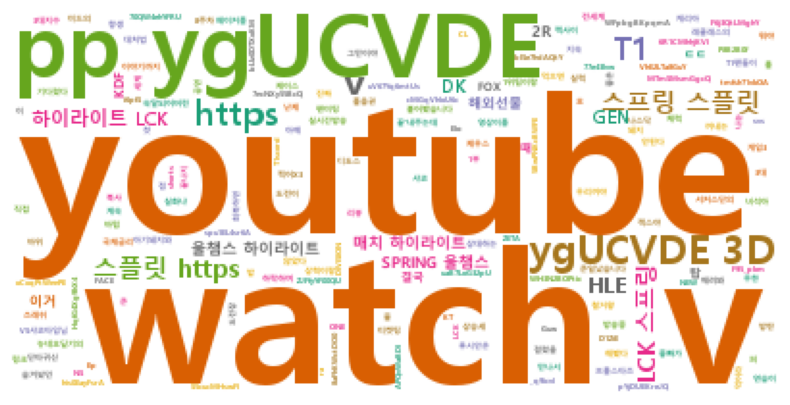

In [64]:
plt.figure(figsize = (12, 5)) # 워드클라우드 크기 설정
plt.axis('off')
plt.imshow(wc)
plt.savefig('./워드클라우드결과.jpg') # 이미지 결과 저장